In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

In [3]:
# take a look to the data and import
train = pd.read_csv("train.csv")
train_y = train.SalePrice #target
train_X = train.drop("SalePrice",1) #features
# i've splitted the target and the features into 2 different datastructure, useful to pass them then to the model to do the fit

In [4]:
train_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
train_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

HANDLING WITH MISSING DATA. WE CAN SIMPLY DROP THOSE COLUMNS THAT NOT CONTAINS THE VALUES OR REPLACE THEM WITH 
A VALUE AS MEAN/MEDAIN/TOP FREQUENT(IMPUTATION). HOWEVER WE HAVE TO BE CAREFUL BECAUSE THERE ARE 
MANY FEATURES THAT HAVE MISSING DATA, SOME MORE THAN OTHERS.

In [31]:
total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])[:20]
missing

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


AS SEEN SOME FEATURES HAVE AN HIGH PERCENTAGE OF MISSING VALUES. THEY ARE VALUE THAT REALLY DON'T GIVE ANY 
KIND OF INFORMATION TO MY MODEL SO IT MIGHT BE BETTER JUST TO DROP THEM. FOR THE FETURES THAT INSTEAD SHOW SOME 
FEW MISSING VALUES WE SIMPLY REPLACE THEM WITH THE MEAN -or something else- (IMPUTATION).

IF WE SET A THRESHOLD OF 20% OF MISSING VALUE WE CAN DROP THEN FROM "PoolQC" TO "FireplaceQu"

In [32]:
train_X = train_X.drop((missing[missing["Percent"] >= 0.20]).index,1)

In [33]:
total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])[:15]
missing

,Total,Percent
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342


however some of features with missing data are left with something in common among them. beside the LoftFrontage the Garage* features present all the same number of missing data as the Bsmnt*. We can imagine that these features are, in some way, correlated and for this reason they are showing the same information. We can focus more on the correlation between features and choose how to deal with them.

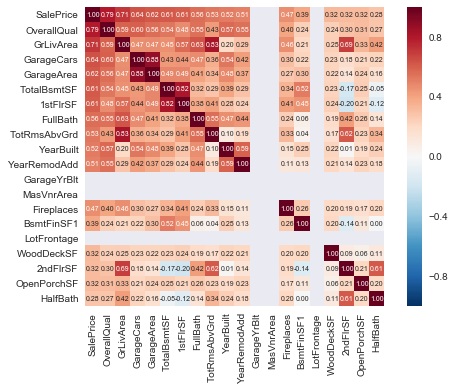

In [9]:
# correlation matrix
corrmat = train.corr()
# set k=20-- it'll be used later
k=20
# nlarget allow me to retrieve the k more correlated feature to my target--in this case k=20
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
# columns most correlated
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
# heatmap between columns
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"]
cols

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

In [34]:
# garege cars between all the garage seems to be the more correlated featured among all, so we'll 
# discard all the others keeping only garagecars
no_garage = ["GarageType","GarageFinish", "GarageQual", "GarageCond", "GarageYrBlt"]
train_X = train_X.drop(no_garage, 1)

In [35]:
total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])[:15]
missing

,Total,Percent
LotFrontage,259,0.177397
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342
MasVnrArea,8,0.005479
MasVnrType,8,0.005479
Electrical,1,0.000685
Street,0,0.000000


In [37]:
# LotFrontage seems also quite correlated so we can see if filling all the NA values with the mean improves the
# correlation or not
# To fill the missing value i'll use the Imputer, as stategy i've choosen the "most_frequent". We can change it
# with "mean" or "median"
imp=Imputer(missing_values="NaN", strategy="most_frequent") # Initializing the imputer
train_X["LotFrontage"]=imp.fit_transform(train_X[["LotFrontage"]]).ravel()

In [38]:
total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])[:8]
missing

,Total,Percent
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342
MasVnrArea,8,0.005479
MasVnrType,8,0.005479
Electrical,1,0.000685


In [90]:
# Filling also MasVnrArea always with the imputer
train_X["MasVnrArea"]=imp.fit_transform(train_X[["MasVnrArea"]]).ravel()

In [71]:
#replace the missing unique missing value in Electrical --- .fillna() didn't worked with pandas series..
train_X.loc[train_X['Electrical'].isnull()] #find the location in dataset where the value of Electrical is null
train_X["Electrical"][1379]="SBrkr" #replace the value

C:\Users\Piero Fronte\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
ind = train_X.loc[train_X['MasVnrType'].isnull()].index #find the location in dataset where the value of Electrical is null
for i in ind:
    train_X["MasVnrType"][i] = train_X["Electrical"].describe().top

C:\Users\Piero Fronte\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In Electrical and MasVnrType i didn't use the imputer because they are categorical values, not numerical. As i understood the imputer works only with numerical values

In [97]:
total = train_X.isnull().sum().sort_values(ascending=False)
percent = (train_X.isnull().sum()/train_X.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])[:5]
missing

,Total,Percent
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342


These features left with NA values actually can't be touched because as you see in the description NA is not a missing value but it's just a "NO Basement". it would be incorrect replace a "No basement" value with something else

In [100]:
encoded_categorical_predictors = pd.get_dummies(train_X)

In [101]:
encoded_categorical_predictors.corrwith(train_y).sort_values(ascending=False)

OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.472614
MasVnrAreal              0.472614
Fireplaces               0.466929
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
LotFrontage              0.329220
WoodDeckSF               0.324413
KitchenQual_Gd           0.321641
2ndFlrSF      

Now a new important step is done. The encoding of categorical features into numerical ones. Many feature as we can see from the description are categorical features(text) instead of numerical. This migth be a problem because no ML methods is capable to work with this type of data. One thing to do is then encode this variables with the pd.get_dummies method and then include them in the predictors. After the encoding i've recalculated the correlation between predictors and target and as expected new features (good correlated) appeared. Again let's see if there is some null values, just to be sure.

In [102]:
total = encoded_categorical_predictors.isnull().sum().sort_values(ascending=False)
percent = (encoded_categorical_predictors.isnull().sum()/encoded_categorical_predictors.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])[:5]
missing

,Total,Percent
SaleCondition_Partial,0,0.0
Neighborhood_NridgHt,0,0.0
Condition1_PosN,0,0.0
Condition1_PosA,0,0.0
Condition1_Norm,0,0.0
